## Part A
### Preprocessing of the clinical dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('clinical_dataset.csv', delimiter=';')
print(df.shape)
df.head()

(540, 55)


,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


1. Converting nominal features to numerical

In [2]:
df.replace(to_replace="Yes", value=1, inplace=True)
df.replace(to_replace="No", value=0, inplace=True)

converts = {"fried":     {"Frail": 2, "Pre-frail": 1, "Non frail": 0},
               "gender":    {"M": 1, "F":0 },
               "vision":     {"Sees well": 2, "Sees moderately": 1, "Sees poorly": 0},
               "audition":     {"Hears well": 2, "Hears moderately": 1, "Hears poorly": 0},
               "balance_single": {">5 sec": 1, "<5 sec":  0},
               "gait_optional_binary": {"FALSE": 0, "TRUE": 1},
               "sleep":     {"No sleep problem": 2, "Occasional sleep problem": 1,
                             "Permanent sleep problem": 0},
               "health_rate": {"5 - Excellent": 4, "4 - Good":  3, "3 - Medium":  2, "2 - Bad":  1,
                               "1 - Very bad":  0},
               "health_rate_comparison": {"5 - A lot better": 4, "4 - A little better":  3,
                                          "3 - About the same":  2, "2 - A little worse":  1,
                                          "1 - A lot worse":  0},
               "activity_regular": {"> 5 h per week": 3, "> 2 h and < 5 h per week":  2,
                                    "< 2 h per week":  1, "No":  0},
               "smoking":     {"Current smoker": 2, "Past smoker (stopped at least 6 months)": 1,
                               "Never smoked": 0}
              }

df.replace(converts, inplace=True)
df['gait_optional_binary'] = df['gait_optional_binary'].astype(float)
df.head()
# If the dataset didn't contain NaN values or if we did an outlier detection and removal of erroneous data
# prior to conversion, a OneHotEncoder approach would be possible, and necessary for larger datasets.
# example:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# enc.fit(df[["fried"]])
# df[["fried"]] = enc.transform(df[["fried"]]).astype(int)

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,0,0,75,0,0,0,1,2,0.0,...,2.0,4.2,2.0,0.0,1.0,6.0,31.0,5,0,5
1,1002,1,1,73,0,1,0,1,1,0.0,...,1.0,3.3,2.0,0.0,14.0,6.0,26.0,12,0,4
2,1003,1,1,72,0,0,0,1,1,0.0,...,2.0,3.4,1.0,1.0,21.0,6.0,26.0,9,0,3
3,1004,2,0,88,0,0,0,1,1,0.0,...,2.0,7.3,1.0,0.0,21.0,5.5,20.0,11,0,8
4,1005,1,0,83,0,4,1,1,0,0.0,...,2.0,3.0,3.0,2.0,0.0,6.0,30.0,12,0,4


2. Remove erroneous values

- Remove NaN rows of crucial features, 999 values and more..

In [3]:
# Remove rows from the 5 parameters of fried, that contain NaN values
df.dropna(subset=['weight_loss'])
df = df[df['gait_speed_slower'] != "Test not adequate"]
df = df.replace ({'test non realizable': np.nan})
df = df.replace ({999 : np.nan})
df.loc[(df['bmi_score'] > 50), 'bmi_score']=np.nan
df.loc[(df['lean_body_mass'] < 0), 'lean_body_mass']=np.nan

df.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001.0,0.0,0.0,75.0,0.0,0.0,0.0,1.0,2.0,0.0,...,2.0,4.2,2.0,0.0,1.0,6.0,31.0,5.0,0.0,5.0
1,1002.0,1.0,1.0,73.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,3.3,2.0,0.0,14.0,6.0,26.0,12.0,0.0,4.0
2,1003.0,1.0,1.0,72.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3.4,1.0,1.0,21.0,6.0,26.0,9.0,0.0,3.0
3,1004.0,2.0,0.0,88.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,7.3,1.0,0.0,21.0,5.5,20.0,11.0,0.0,8.0
4,1005.0,1.0,0.0,83.0,0.0,4.0,1.0,1.0,0.0,0.0,...,2.0,3.0,3.0,2.0,0.0,6.0,30.0,12.0,0.0,4.0


- Remove rows with 10% NaN, and columns with 15% NaN

In [4]:
#   Rows with NaN percentage > 10%
row_nan_mean = df.isnull().mean(axis=1)
r = row_nan_mean > 0.1
row_remove = df.loc[r, :]
df.drop(row_remove.index, axis = 0, inplace = True)

#   Columns with NaN percentage > 15%
col_nan_mean = df.isnull().mean()
c = col_nan_mean > 0.15
col_removed = df.loc[:, c]
df.drop(col_removed , axis=1, inplace=True)

df.fillna(df.mean().astype(int), inplace=True)

- Visualize outliers with boxplot

Text(0.5, 1.0, 'comorbidities_count')

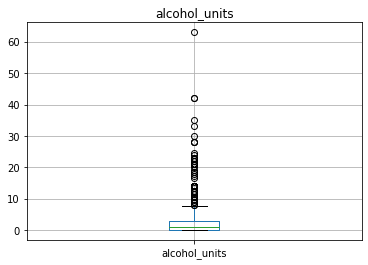

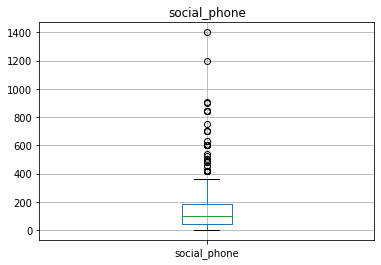

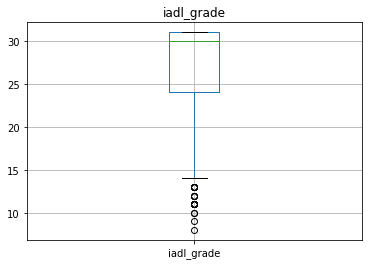

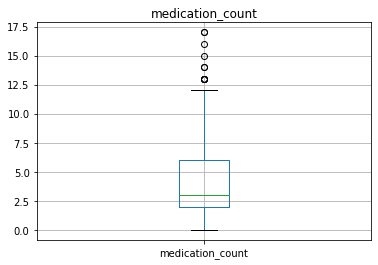

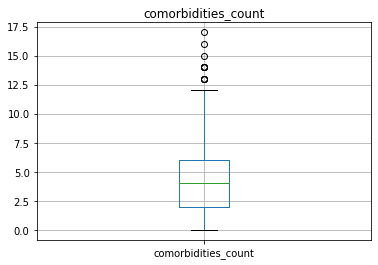

In [5]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column=['alcohol_units'])
plt.title("alcohol_units")

plt.figure()
df.boxplot(column=["social_phone"])
plt.title("social_phone")

plt.figure()
df.boxplot(column=["iadl_grade"])
plt.title("iadl_grade")

plt.figure()
df.boxplot(column=["medication_count"])
plt.title("medication_count")

plt.figure()
df.boxplot(column=["comorbidities_count"])
plt.title("comorbidities_count")

3. Handle missing values

- Outlier Detection using Tukey IQR and replace with mean

Text(0.5, 1.0, 'iadl_grade')

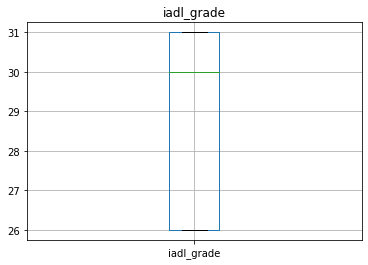

In [6]:
Q1 = df.quantile()
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

for i in df:
    mean = df[i].mean().astype(int)
    if mean != 0:
        df[i] = df[i].mask(df[i] > upper[i], mean)
        df[i] = df[i].mask(df[i] < lower[i], mean)

df.to_csv('preprocessed_clinical.csv', index=False)

plt.figure()
df.boxplot(column=["iadl_grade"])
plt.title("iadl_grade")

### Classification
- Splitting the dataset

In [7]:
X = df.drop(['part_id', 'fried', 'weight_loss', 'exhaustion_score', 'gait_speed_slower',
                'grip_strength_abnormal', 'low_physical_activity'], axis=1)
y = df['fried']

- Create Training and Test Sets and Apply Scaling

In [8]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Logistic Regression

Accuracy of Logistic Regression classifier on training set: 0.74
Accuracy of Logistic Regression classifier on test set: 0.63

              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69        63
         1.0       0.67      0.59      0.63        76
         2.0       0.41      0.45      0.43        20

    accuracy                           0.63       159
   macro avg       0.58      0.59      0.58       159
weighted avg       0.63      0.63      0.63       159



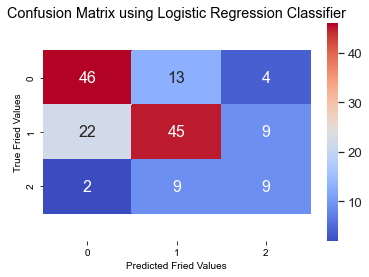

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= "liblinear", max_iter=5000)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}\n'.format(logreg.score(X_test, y_test)))
y_pred = logreg.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_logreg, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Logistic Regression Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Decision Tree

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.57

              precision    recall  f1-score   support

         0.0       0.62      0.63      0.62        63
         1.0       0.63      0.54      0.58        76
         2.0       0.34      0.50      0.41        20

    accuracy                           0.57       159
   macro avg       0.53      0.56      0.54       159
weighted avg       0.59      0.57      0.58       159



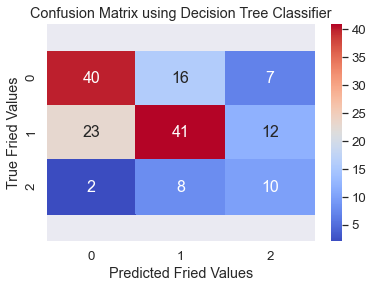

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_clf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_clf, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Decision Tree Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- K-Nearest Neighbors


Accuracy of K-NN classifier on training set: 0.69
Accuracy of K-NN classifier on test set: 0.53

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60        63
         1.0       0.53      0.43      0.48        76
         2.0       0.57      0.40      0.47        20

    accuracy                           0.53       159
   macro avg       0.54      0.51      0.52       159
weighted avg       0.54      0.53      0.53       159



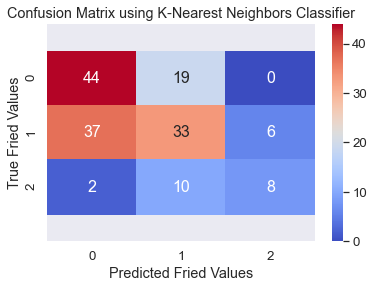

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}\n'.format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_knn, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using K-Nearest Neighbors Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Gaussian Naive Bayes

Accuracy of Gaussian Naive Bayes classifier on training set: 0.65
Accuracy of Gaussian Naive Bayes classifier on test set: 0.60

              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69        63
         1.0       0.66      0.43      0.52        76
         2.0       0.44      0.60      0.51        20

    accuracy                           0.60       159
   macro avg       0.57      0.61      0.57       159
weighted avg       0.61      0.60      0.59       159



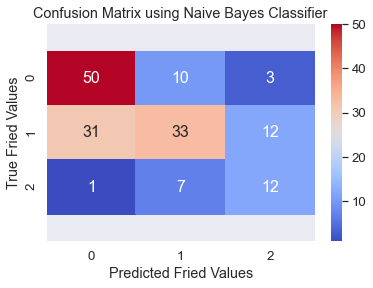

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}\n'.format(gnb.score(X_test, y_test)))
y_pred = gnb.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_gnb = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_gnb, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion matrix of the classifier')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Naive Bayes Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Support Vector Machine

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.60

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62        63
         1.0       0.59      0.62      0.60        76
         2.0       0.62      0.40      0.48        20

    accuracy                           0.60       159
   macro avg       0.60      0.55      0.57       159
weighted avg       0.60      0.60      0.59       159



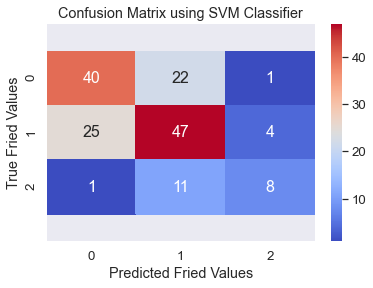

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}\n'.format(svm.score(X_test, y_test)))

y_pred = svm.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_svc = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_svc, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion matrix of the classifier')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using SVM Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Random Forest

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.67

              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69        63
         1.0       0.67      0.66      0.66        76
         2.0       0.77      0.50      0.61        20

    accuracy                           0.67       159
   macro avg       0.69      0.63      0.65       159
weighted avg       0.67      0.67      0.66       159



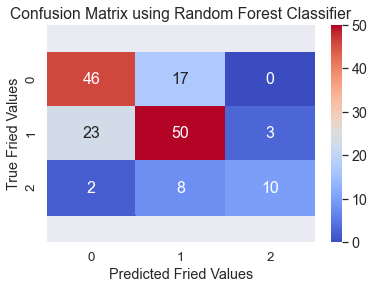

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = clf=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}\n'.format(rf.score(X_test, y_test)))
y_pred = rf.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_rf, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.3)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Random Forest Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()